In [1]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import TO_sim.analytical.order_sec_parameter as OSP

In [101]:
temp = glob.glob(rf'./Ensembles/N = {N} K = {K} *.npz')

In [103]:
A = np.load(temp[0])
T = []
for f in temp[1:2]:
    B =  np.load(f)
    for num,(i,j) in enumerate(zip(A.values(),B.values())):
        if num!=0:
            temp_ = np.concatenate([i,j],axis=1)
            T.append(temp_)
        
for f in temp[2:]:
    B =  np.load(f)
    for num,(j) in enumerate(B.values()):
        if num!=0:
            temp_ = np.concatenate([T[num-1],j],axis=1)
            T[num-1] = temp_


In [104]:
S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM  = T

In [105]:
np.savez(f'./Ensembles/N = {N} K = {K}',ms=ms,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)


In [11]:
N = 3000
K = 5

# A = np.load(f'./Ensembles/wo_pvel/N = {N} K = {K}.npz')
A = np.load(f'./Ensembles/N = {N} K = {K}.npz')
# ms,S0,SP,SM,R0,RP,RM=A.values()

ms,S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM = A.values()


In [13]:
S0_m = np.nanmean(S0,axis=1)
S0_std = np.nanstd(S0,axis=1)
SP_m = np.nanmean(SP,axis=1)
SP_std = np.nanstd(SP,axis=1)
SM_m = np.nanmean(SM,axis=1)
SM_std = np.nanstd(SM,axis=1)


R0_m = np.nanmean(R0,axis=1)
R0_std = np.nanstd(R0,axis=1)
RP_m = np.nanmean(RP,axis=1)
RP_std = np.nanstd(RP,axis=1)
RM_m = np.nanmean(RM,axis=1)
RM_std = np.nanstd(RM,axis=1)

In [4]:
df_Km = pd.read_excel('Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_K = df_Km.query('K == 5').reset_index().set_index('m')

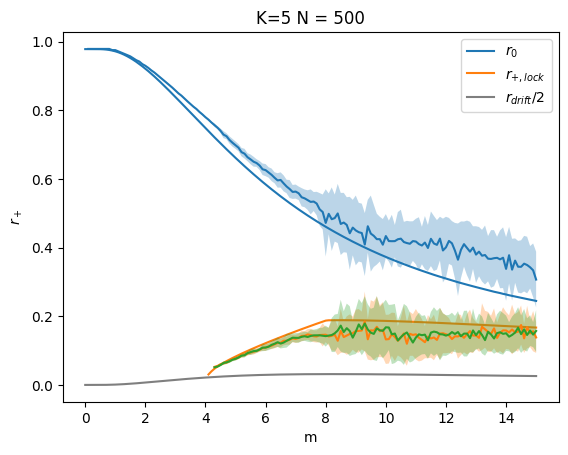

In [5]:
plt.plot(ms,R0_m)
plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
plt.plot(ms,RP_m)
plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
plt.plot(ms,RM_m)
plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


# plt.plot(ms,RPT,',')

plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend()
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

In [279]:
df_K

,K,rM_u,rM_d,r0_u,r0_d,rd_u,rd_d,r+_ul,r+_drift,mu,r+_total_u,r+_total_d,r+_total_ul,r+_total_ud
m,,,,,,,,,,,,,,
0.0,5.0,0.978364,0.978364,0.978364,0.978364,0.000000e+00,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
0.1,5.0,0.978364,NaN,0.978364,NaN,1.942163e-07,NaN,NaN,9.710814e-08,NaN,NaN,NaN,NaN,NaN
0.2,5.0,0.978363,NaN,0.978364,NaN,4.978953e-07,NaN,NaN,2.489476e-07,NaN,NaN,NaN,NaN,NaN
0.3,5.0,0.978353,NaN,0.978358,NaN,4.422220e-06,NaN,NaN,2.211110e-06,NaN,NaN,NaN,NaN,NaN
0.4,5.0,0.978287,NaN,0.978312,NaN,2.462596e-05,NaN,NaN,1.231298e-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,5.0,0.199361,0.005957,0.251841,0.018855,5.247997e-02,0.012898,0.168825,2.623998e-02,NaN,0.168825,NaN,NaN,NaN
14.7,5.0,0.197881,0.005960,0.250172,0.018821,5.229144e-02,0.012860,0.168396,2.614572e-02,NaN,0.168396,NaN,NaN,NaN
14.8,5.0,0.196284,0.005972,0.248371,0.018801,5.208733e-02,0.012829,0.167963,2.604366e-02,NaN,0.167963,NaN,NaN,NaN


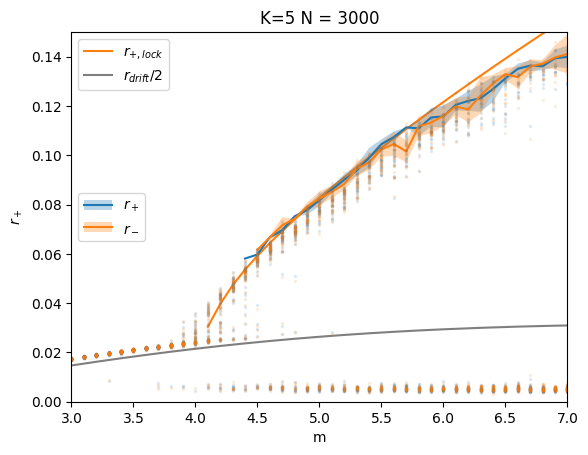

In [14]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
lp,= plt.plot(ms,RP_m)
lfp =plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
lm, = plt.plot(ms,RM_m)
lmp=plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


Pls=plt.plot(ms,RPT,'.',color='tab:blue',alpha=0.1,markersize=3)
Mls=plt.plot(ms,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_+$','$r_-$'],loc='center left')
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=2)
plt.xlim(3,7)
plt.ylim(0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

Text(0, 0.5, '$r_+$')

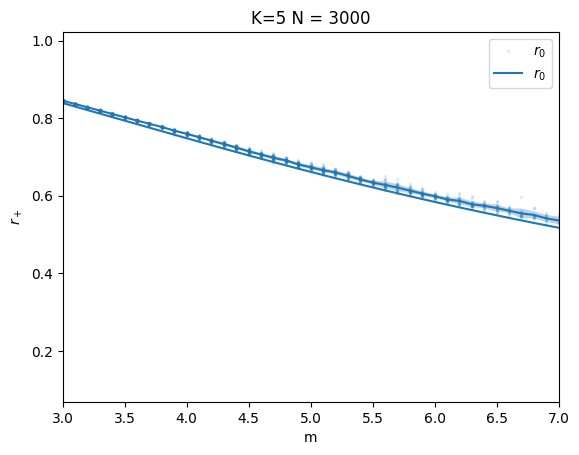

In [281]:
plt.plot(ms,R0_m)
plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)

Pls=plt.plot(ms,R0,'.',color='tab:blue',alpha=0.1,markersize=3)
# Mls=plt.plot(ms,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

# plt.gca().add_artist(leg1)
r_,= plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
# plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
# plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)

leg1 = plt.legend([Pls[0],r_],['$r_0$','$r_0$'])#,loc='center right')

# plt.legend(loc=2)
plt.xlim(3,7)
# plt.ylim(0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

# plt.legend()